In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("file1.csv")


In [40]:
df.rename(columns={
    'Unemployment Rate (UR) (in per cent) according to usual status (ps+ss) for persons of age 15-29 years': 
    'Unemployment Rate (%)'
}, inplace=True)


In [41]:
df['Year'] = df['Year'].str[:4].astype(int)


In [43]:

X = df[['Year']]
y = df['Unemployment Rate (%)']

In [44]:


model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [45]:


future_years = pd.DataFrame({'Year': np.arange(2025, 2031)})
future_preds = model.predict(future_years)

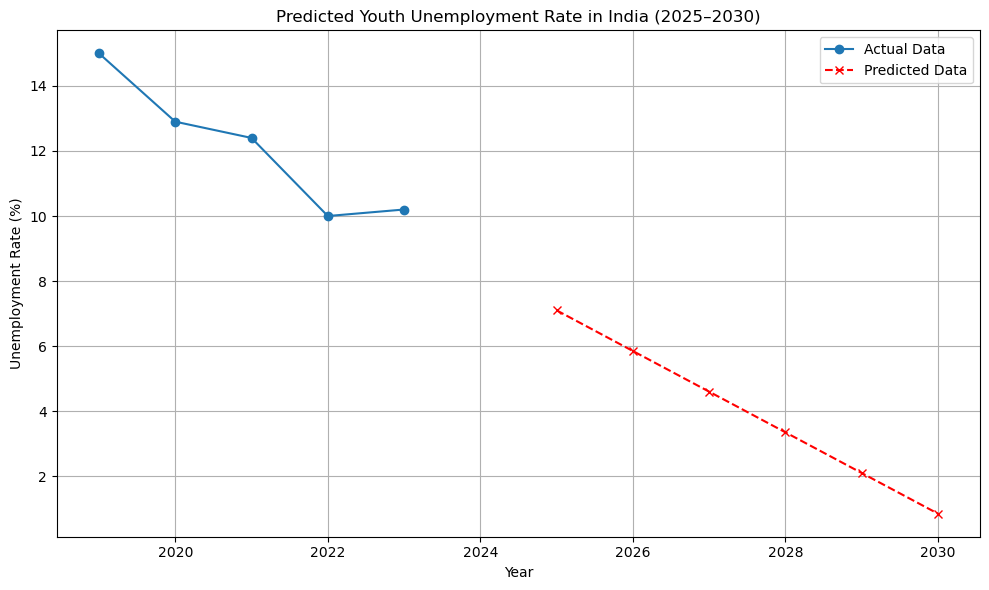

In [46]:

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], y, marker='o', label='Actual Data')
plt.plot(future_years['Year'], future_preds, marker='x', linestyle='--', color='red', label='Predicted Data')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Predicted Youth Unemployment Rate in India (2025–2030)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
# 📋 Print predictions
for year, rate in zip(future_years['Year'], future_preds):
    print(f"Predicted Unemployment Rate in {year}: {rate:.2f}%")


Predicted Unemployment Rate in 2025: 7.10%
Predicted Unemployment Rate in 2026: 5.85%
Predicted Unemployment Rate in 2027: 4.60%
Predicted Unemployment Rate in 2028: 3.35%
Predicted Unemployment Rate in 2029: 2.10%
Predicted Unemployment Rate in 2030: 0.85%


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:

y_pred = model.predict(X)

In [50]:

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [51]:

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.31
R² Score: 0.91


In [52]:

future_df = future_years.copy()
future_df['Predicted Unemployment Rate (%)'] = future_preds

In [53]:

future_df.to_csv("future_unemployment_predictions.csv", index=False)
print("Predicted data saved to future_unemployment_predictions.csv")


Predicted data saved to future_unemployment_predictions.csv


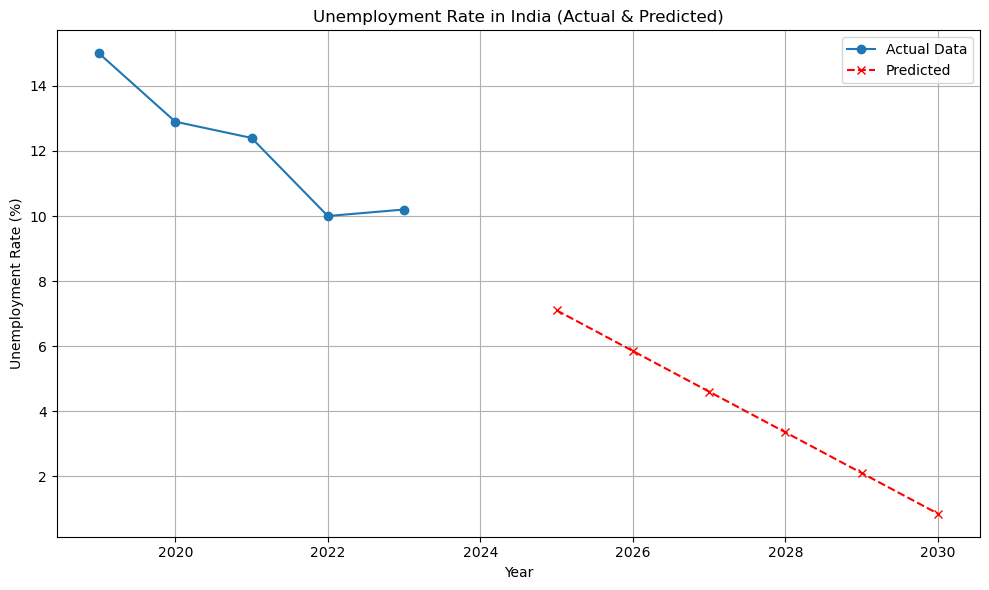

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label='Actual Data')
plt.plot(future_years, future_preds, marker='x', linestyle='--', color='red', label='Predicted')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate in India (Actual & Predicted)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
import pickle


with open("unemployment_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as 'unemployment_model.pkl'")

Model saved as 'unemployment_model.pkl'
